<a href="https://colab.research.google.com/github/pranavagrawal321/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pranavagrawal321/Datasets/main/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.drop(["area_type", "society", "balcony", "availability"], axis=1, inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df["bhk"] = df["size"].str.split().str[0]
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df.drop("size", axis=1, inplace=True)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
df.value_counts()

location      total_sqft  bath  price   bhk
Haralur Road  1243        2.0   46.00   2      18
TC Palaya     1200        2.0   66.00   3      13
Chandapura    645         1.0   16.45   1      11
HSR Layout    1140        2.0   46.00   2       9
Haralur Road  1194        2.0   47.00   2       8
                                               ..
              1810        3.0   97.83   3       1
                                112.00  3       1
                                126.00  3       1
              1817        3.0   110.00  3       1
whitefiled    935         2.0   32.73   2       1
Length: 12358, dtype: int64

In [ ]:
df["bhk"].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [ ]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: total_sqft, Length: 2067, dtype: int64

In [ ]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df[~df["total_sqft"].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [ ]:
df[~df["total_sqft"].apply(is_float)]["total_sqft"].value_counts()

2830 - 2882        5
3630 - 3800        3
142.61Sq. Meter    2
1255 - 1350        2
2580 - 2591        2
                  ..
888 - 1290         1
660 - 700          1
385 - 440          1
770 - 841          1
1133 - 1384        1
Name: total_sqft, Length: 173, dtype: int64

In [ ]:
def sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])/2)
    try:
        return float(x)
    except:
        return None

In [ ]:
df["total_sqft"] = df["total_sqft"].apply(sqft_to_num)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df.loc[30]

location      Yelahanka
total_sqft       3525.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
df.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [ ]:
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df["location"].value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [ ]:
df[df["location"].map(df["location"].value_counts()) <= 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,370.00,6,36274.509804
18,Ramakrishnappa Layout,2770.0,4.0,290.00,3,10469.314079
19,Manayata Tech Park,1100.0,2.0,48.00,2,4363.636364
24,Thanisandra,510.0,1.0,25.25,1,4950.980392
25,Mangammanapalya,1250.0,3.0,56.00,3,4480.000000
...,...,...,...,...,...,...
13291,Weavers Colony,812.0,1.0,26.00,1,3201.970443
13292,Udayapur Village,1440.0,2.0,63.93,3,4439.583333
13302,Annaiah Reddy Layout,1075.0,2.0,48.00,2,4465.116279
13306,Rajarajeshwari Nagara,1200.0,5.0,325.00,4,27083.333333


In [ ]:
mask = df["location"].map(df["location"].value_counts()) <= 10
df["location"] = df["location"].where(~mask, "other")
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df["location"].value_counts()

other                        2887
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: location, Length: 241, dtype: int64

In [ ]:
df["total_sqft"].dtype

dtype('float64')

In [ ]:
df["bhk"].dtype

dtype('O')

In [ ]:
df["bhk"] = df["bhk"].astype(int)

In [ ]:
df[df["total_sqft"]/df["bhk"] < 300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [ ]:
df = df[~(df["total_sqft"]/df["bhk"] < 300)]
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 12456, dtype: float64

In [ ]:
df["price_per_sqft"].unique()

array([ 3699.81060606,  4615.38461538,  4305.55555556, ...,
        6689.83492615,  5258.54513585, 10407.33631904])

In [ ]:
df["price_per_sqft"].describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
for i in df.groupby("location"):
    print(i)

Streaming output truncated to the last 5000 lines.
9722   BEML Layout      2400.0   2.0  228.0    2     9500.000000
11978  BEML Layout      2000.0   3.0   85.0    3     4250.000000
12066  BEML Layout      2000.0   3.0   85.0    3     4250.000000
12872  BEML Layout      1194.0   2.0   65.0    2     5443.886097)
('BTM 2nd Stage',             location  total_sqft  bath  price  bhk  price_per_sqft
1978   BTM 2nd Stage      1260.0   5.0  185.0    3    14682.539683
2087   BTM 2nd Stage       950.0   2.0   52.0    2     5473.684211
2735   BTM 2nd Stage      1850.0   3.0  170.0    3     9189.189189
2784   BTM 2nd Stage      1200.0   2.0   80.0    2     6666.666667
2863   BTM 2nd Stage      1500.0   2.0  450.0    4    30000.000000
2871   BTM 2nd Stage      1274.0   2.0   70.0    2     5494.505495
4486   BTM 2nd Stage      1200.0   2.0   35.0    2     2916.666667
4549   BTM 2nd Stage      1250.0   3.0   50.0    3     4000.000000
4682   BTM 2nd Stage      1070.0   2.0   48.0    2     4485.981308


In [ ]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        st = np.std(subdf["price_per_sqft"])
        reduced_df = subdf[(subdf["price_per_sqft"] > m - st) & (subdf["price_per_sqft"] <= m + st)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [ ]:
df = remove_price_per_sqft_outliers(df)

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509


In [ ]:
df.shape

(10235, 6)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_scatter(df, location):
    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
    plt.scatter(bhk2["total_sqft"], bhk2["price"], color="blue", label="2 bhk")
    plt.scatter(bhk3["total_sqft"], bhk3["price"], color="green", marker="+", label="3 bhk")
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()

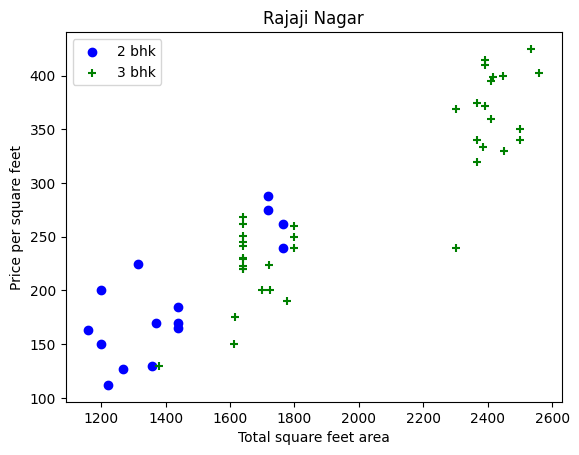

In [ ]:
plot_scatter(df, "Rajaji Nagar")

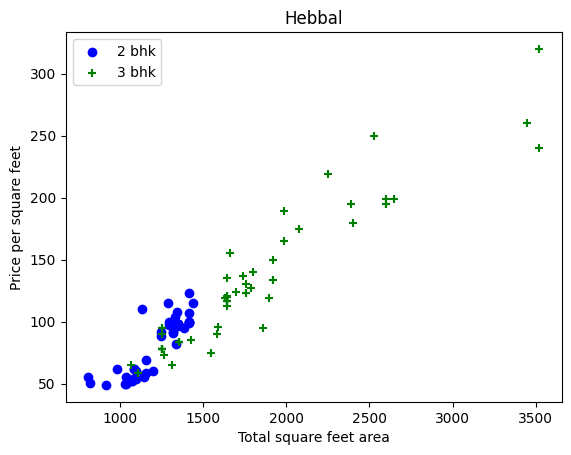

In [ ]:
plot_scatter(df, "Hebbal")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in df.groupby("location"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df["price_per_sqft"]),
                "std": np.std(bhk_df["price_per_sqft"]),
                "count": bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price_per_sqft"] < (stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")

In [ ]:
df = remove_bhk_outliers(df)
df.shape

(10235, 6)

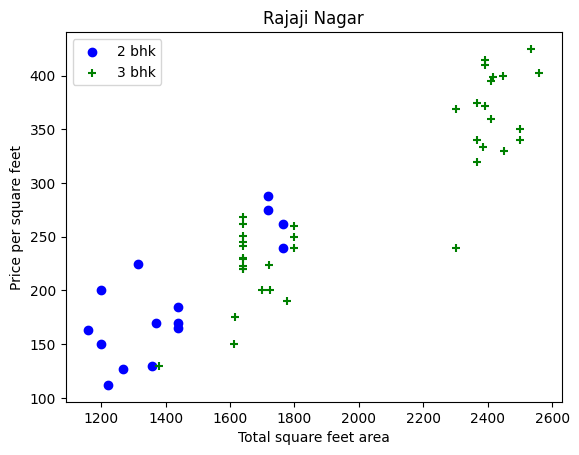

In [ ]:
plot_scatter(df, "Rajaji Nagar")

Text(0, 0.5, 'Count')

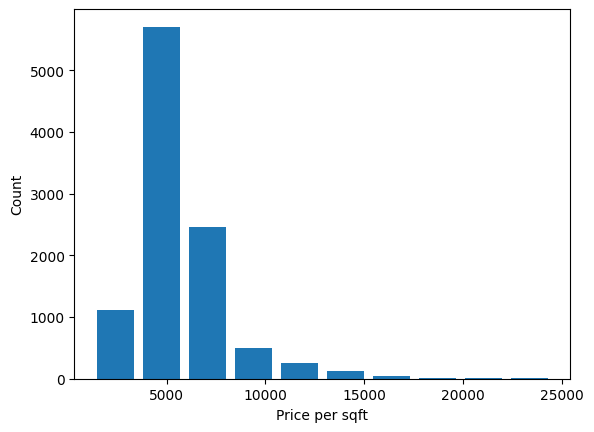

In [ ]:
plt.hist(df["price_per_sqft"], rwidth=.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [ ]:
df["bath"]

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
10230    2.0
10231    1.0
10232    2.0
10233    2.0
10234    5.0
Name: bath, Length: 10235, dtype: float64

In [ ]:
df["bath"].value_counts()

2.0     5944
3.0     2616
4.0      680
1.0      600
5.0      233
6.0      104
7.0       26
8.0       17
9.0       10
12.0       3
16.0       1
13.0       1
Name: bath, dtype: int64

In [ ]:
df[df["bath"] > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5267,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8468,other,12000.0,12.0,525.0,10,4375.000000
8557,other,10000.0,16.0,550.0,16,5500.000000
9297,other,6000.0,12.0,150.0,11,2500.000000
9629,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

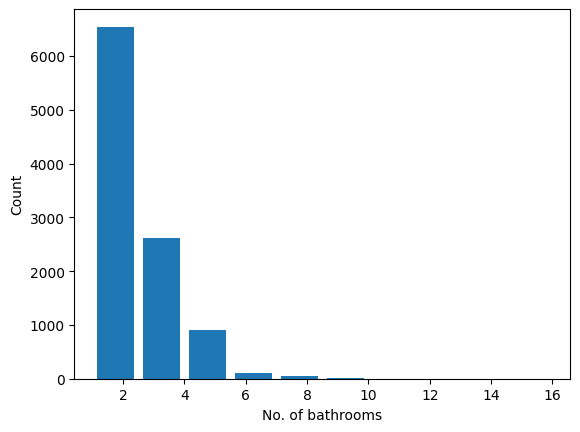

In [ ]:
plt.hist(df["bath"], rwidth=.8)
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")

In [ ]:
df[df["bath"] > df["bhk"] + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1636,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5228,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6696,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8392,other,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df = df[df["bath"] < df["bhk"] + 2]

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509


In [ ]:
df.shape

(10145, 6)

In [ ]:
df.drop(["price_per_sqft"], axis=1, inplace=True)

In [ ]:
df.shape

(10145, 5)

In [ ]:
dummies = pd.get_dummies(df["location"])
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, dummies.drop("other", axis=1)], axis=1)
df.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop("location", inplace=True, axis=1)

In [ ]:
df.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(10145, 244)

In [ ]:
X = df.drop("price", axis=1)
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df["price"]
Y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8510869140790949

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=10)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.86125946, 0.85568216, 0.80770543, 0.81373889, 0.75354578])

In [ ]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [ ]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.49916812682042

In [ ]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.03977922191507

In [ ]:
predict_price("Indira Nagar", 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


171.2779873358889

In [ ]:
df.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["1st Block Jayanagar"]

0        0
1        0
2        0
3        0
4        0
        ..
10230    0
10231    0
10232    0
10233    0
10234    0
Name: 1st Block Jayanagar, Length: 10145, dtype: uint8

In [ ]:
import pickle

In [ ]:
with open("house_price_prediction_model.pickle", "wb") as f:
    pickle.dump(clf, f)

In [ ]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))